In [12]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [14]:
from IPython.display import HTML
style = '<style>svg{width:70% !important; height:70% !important;}</style>'
HTML(style)

In [15]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [16]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [17]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [18]:
X = data[['X_1', 'X_2']]
y = data.Y

In [19]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

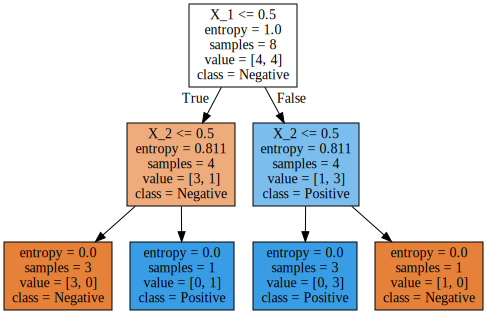

In [20]:
graph = Source(tree.export_graphviz(clf, out_file=None, 
                                   feature_names=list(X), 
                                   class_names=['Negative','Positive'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = '<style>svg{width:70% !important; height:70% !important;}</style>'
HTML(style)

Представьте, что вы решили научить робота для животных отличать собачек от котиков. Для начала проанализируем данные - отметьте все верные утверждения о данном датафрэйме

* Обе переменные Гавкает и Лазает по деревьям дают одинаковый Information Gain, если поместить их в вершину дерева
* Для различения котиков от собачек, по этим данным, хватит всего 1-ой переменной
* Переменная Гавкает позволяет идеально различить 2 вида по исходным данным
* Переменная Лазает по деревьям позволяет идеально различить 2 вида по исходным данным

In [15]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv', index_col=0)

In [9]:
df

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик


In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
X = df[['Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = df['Вид']

In [13]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

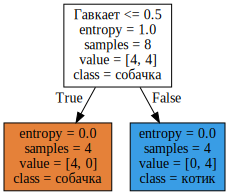

In [14]:
graph = Source(tree.export_graphviz(clf, out_file=None, 
                                   feature_names=list(X), 
                                   class_names=['собачка','котик'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

В нашем Big Data датасэте появились новые наблюдения! Давайте немного посчитаем энтропию, чтобы лучше понять, формализуемость разделения на группы.

Формат записи - энтропия в группе, где переменная равна 0 и энтропия в группе, где переменная равна 1 (десятичный разделитель - точка, округляйте до 2-ого знака при необходимости).

Энтропия при разделении по фиче Шерстист в группах, где Шерстист равно 0 и 1 соответственно, составляет 0 и 0.99.

Энтропия при разделении по фиче Гавкает в группах, где Гавкает равно 0 и 1 соответственно, составляет 0 и 0.72.

Энтропия при разделении по фиче Лазает по деревьям в группах, где эта фича равна 0 и 1 соответственно, составляет 0 и 0.

In [18]:
cats = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)

In [19]:
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [20]:
X = cats[['Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = cats['Вид']

In [21]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

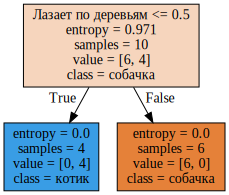

In [22]:
graph = Source(tree.export_graphviz(clf, out_file=None, 
                                   feature_names=list(X), 
                                   class_names=['собачка','котик'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

In [3]:
import math as m

In [5]:
E_sh_sob=(1/1)*m.log2((1/1)) - 0
E_sh_kot=-(4/9)*m.log2((4/9)) - (5/9)*m.log2((5/9))
E_gav_sob=0 - (5/5)*m.log2((5/5))
E_gav_kot=-(4/5)*m.log2((4/5)) - (1/5)*m.log2((1/5))
E_laz_sob=0 - (6/6)*m.log2((6/6))
E_laz_kot=-(4/4)*m.log2((4/4)) - 0

In [10]:
E_sh_sob

0.0

In [11]:
E_sh_kot

0.9910760598382222

In [12]:
E_gav_sob

0.0

In [13]:
E_gav_kot

0.7219280948873623

In [14]:
E_laz_sob

0.0

In [15]:
E_laz_kot

-0.0

Ещё немного арифметики - посчитаем Information Gain по данным из предыдущего задания. Впишите через пробел округлённые до 2-ого знака значения IG для фичей Шерстист, Гавкает и Лазает по деревьям. Десятичным разделителем в данном задании является точка.

По какой переменной нужно делать сплит, исходя из всего этого (не вводите ответ на этот вопрос в поле, просто подумайте)

In [19]:
E = - 4/10 * m.log2(4/10) - 6/10 * m.log2(6/10)
E

0.9709505944546686

In [21]:
ig_шерстист = E - (1/10 * 0 + 9/10 * 0.99)
ig_шерстист

0.07995059445466857

In [23]:
ig_гавкает = E - (5/10 * 0 + 5/10 * 0.72)
ig_гавкает

0.6109505944546686

In [24]:
ig_лазает = E - (4/10 * 0 + 6/10 * 0)
ig_лазает

0.9709505944546686